# Universality theorem - 3D visualization

The aim of this notebook is to show how we can approximate arbitrary real-valued function with one hidden layer neural network. For our purpose we will construct a network taking two inputs $(x, y)$ and giving one output $(z)$. However, the idea may be generalized to any function $f^{(m)}(x_1,...,x_n): R^n\to R^m$. 

In [4]:
import numpy as np

from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from matplotlib import cm

In [73]:
def sigmoid(z):
    '''Returns sigmoid activation function for a given matrix z.'''
    
    return 1./(1. + np.exp(-z))


def step_function(x, y, alpha, R, x0, y0, h, W=100):
    '''
    Returns approximate step function for a given matrices x, y.
    Step function is enclosed between two lines, rotated by alpha angle around 
    point (x0, y0) and moved from this point by R (2 * R might be understood as the width). 
    Its height is given by h. The larger W the sharper step.'''
    
    sin_alpha = np.sin(alpha * np.pi / 180)
    cos_alpha = np.cos(alpha * np.pi / 180)
    Wx = sin_alpha
    Wy = -cos_alpha
    b1 = cos_alpha * (y0 + R * cos_alpha) - sin_alpha * (x0 - R * sin_alpha)
    b2 = cos_alpha * (y0 - R * cos_alpha) - sin_alpha * (x0 + R * sin_alpha)
    n1 = sigmoid(W * (Wx * x + Wy * y + b1))
    n2 = sigmoid(W * (Wx * x + Wy * y + b2))
    
    return h * (n1 - n2)

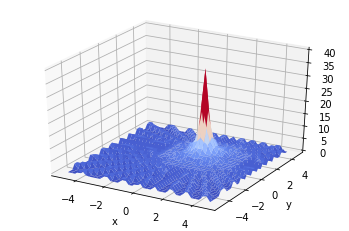

In [84]:
def output(x, y, R=.2, x0=1, y0=1):
    activation = np.zeros(x.shape)
    for alpha in np.arange(0, 180, 10):
        activation += step_function(x, y, alpha, R, x0, y0, 2)
    return activation

fig = plt.figure()
ax = fig.gca(projection='3d')

X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
Z = output(X, Y)

surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm)
ax.set_zlim(0.0, 40.)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()